# Importing Files

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Handling missing values

In [46]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
train.drop(columns ="Cabin", inplace=True)
test.drop(columns ="Cabin", inplace=True)
train.drop(columns ="Name", inplace=True)
test.drop(columns ="Name", inplace=True)

In [49]:
train["Age"].fillna(train["Age"].mean(),inplace = True)
test["Age"].fillna(test["Age"].mean(),inplace = True)

In [50]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [51]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

<BarContainer object of 3 artists>

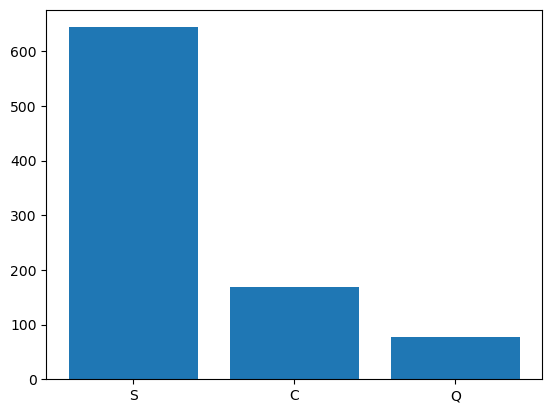

In [52]:
values = train["Embarked"].value_counts()
plt.bar(values.index,values.values)

In [53]:
values = train["Fare"].value_counts()
values

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [54]:
train["Embarked"] = train["Embarked"].fillna("S")

In [55]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [56]:
test["Fare"] = test["Fare"].fillna(8.0500)

In [57]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Handling outlier 

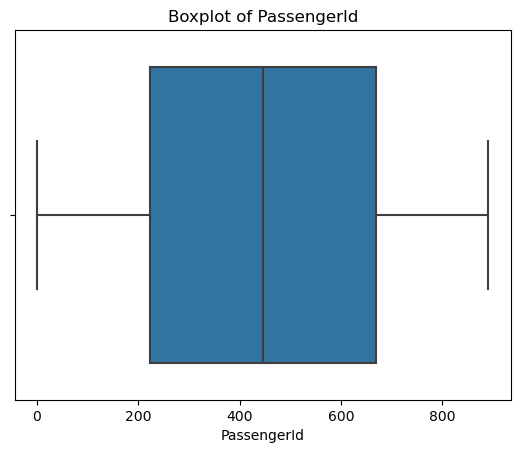

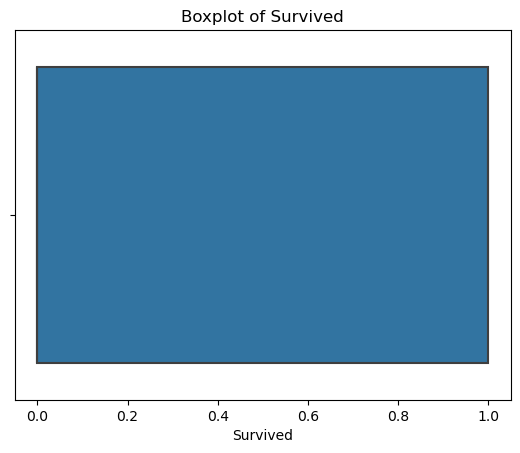

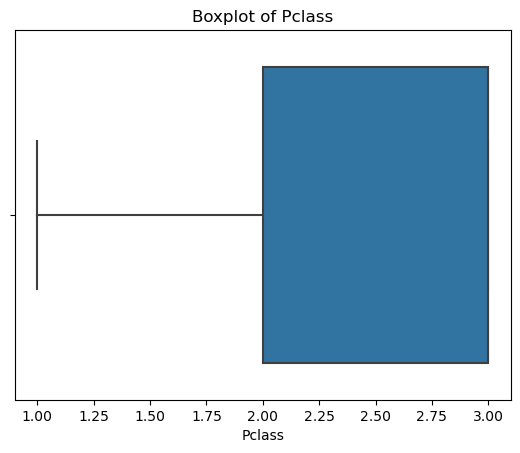

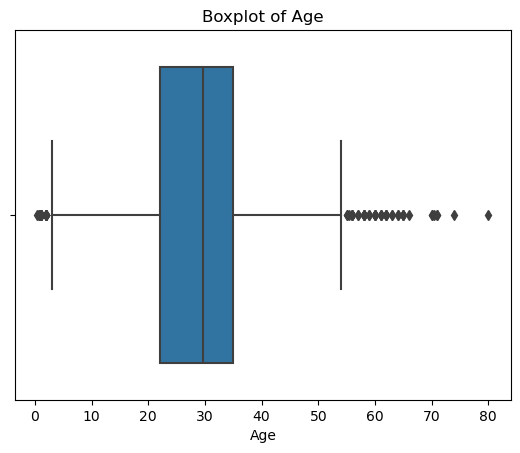

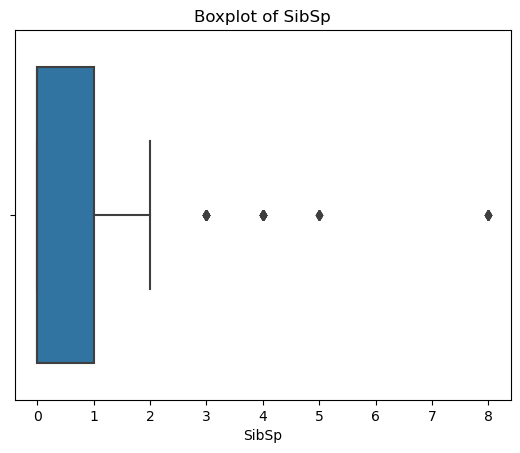

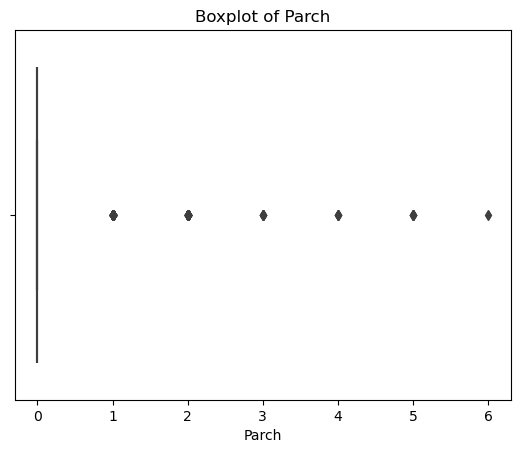

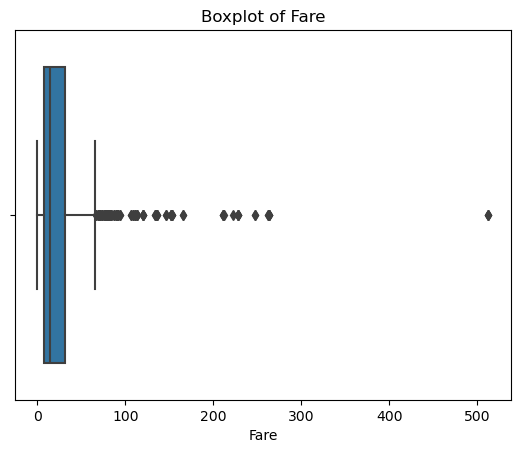

In [58]:
for col in train.columns:
    if pd.api.types.is_numeric_dtype(train[col]):
        sns.boxplot(x=train[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

Q1: 223.5, Q3: 668.5, IQR: 445.0
Lower Bound: -444.0, Upper Bound: 1336.0


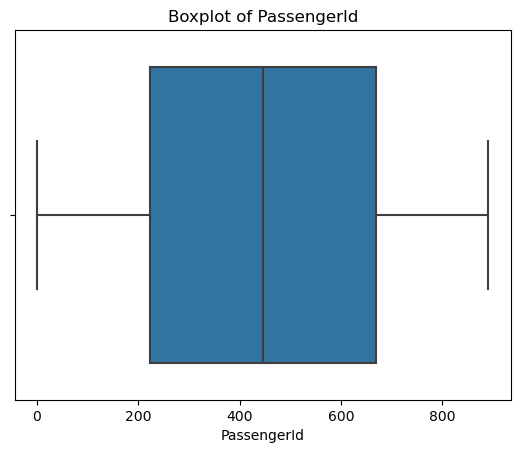

Q1: 0.0, Q3: 1.0, IQR: 1.0
Lower Bound: -1.5, Upper Bound: 2.5


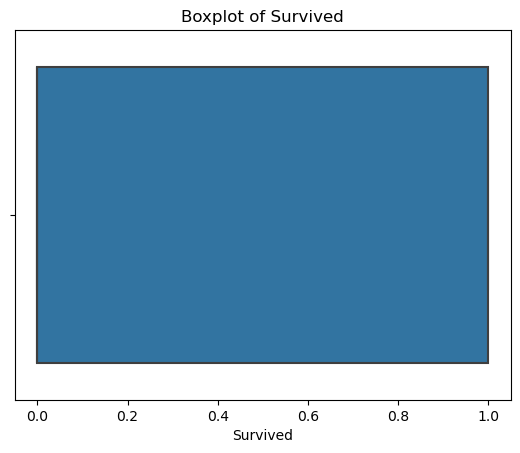

Q1: 2.0, Q3: 3.0, IQR: 1.0
Lower Bound: 0.5, Upper Bound: 4.5


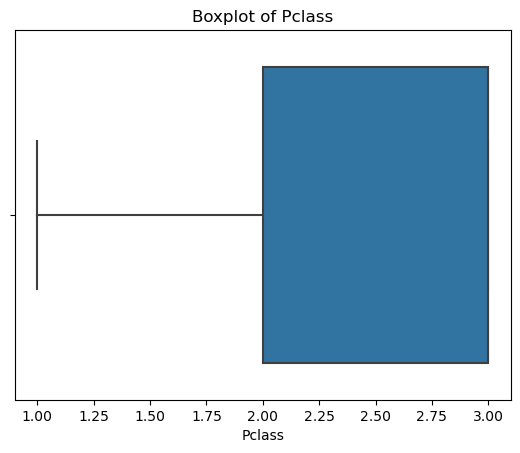

Q1: 22.0, Q3: 35.0, IQR: 13.0
Lower Bound: 2.5, Upper Bound: 54.5


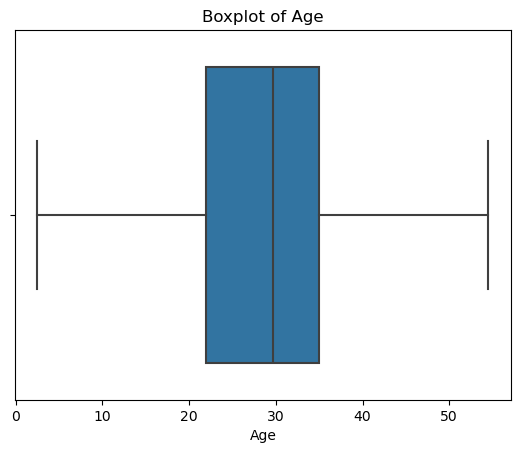

Q1: 0.0, Q3: 1.0, IQR: 1.0
Lower Bound: -1.5, Upper Bound: 2.5


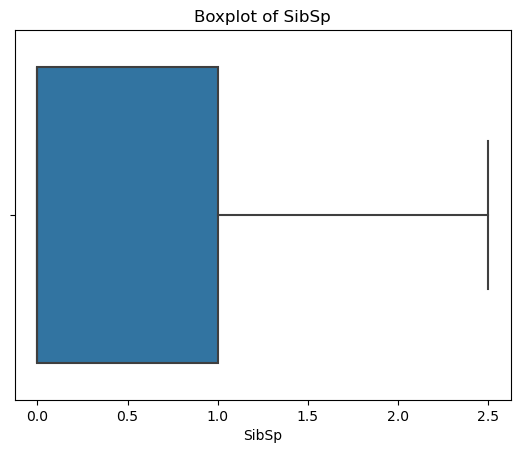

Q1: 7.9104, Q3: 31.0, IQR: 23.0896
Lower Bound: -26.724, Upper Bound: 65.6344


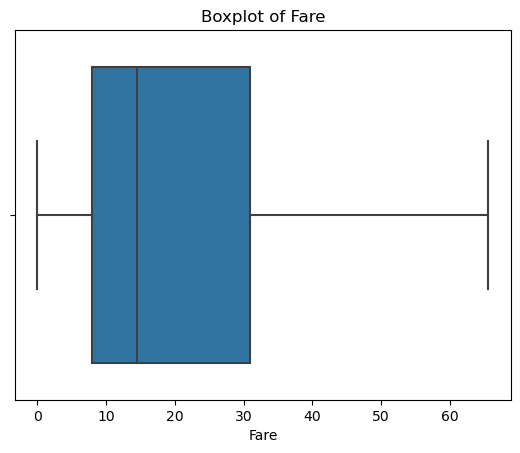

In [59]:
def handle_outliers(column):
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

    lbound = Q1 - 1.5 * IQR
    ubound = Q3 + 1.5 * IQR
    print(f"Lower Bound: {lbound}, Upper Bound: {ubound}")

    train[column] = np.where(train[column] > ubound, ubound,
                          np.where(train[column] < lbound, lbound, train[column]))

for col in train.columns:
    if pd.api.types.is_numeric_dtype(train[col]):
        if col != "Parch":
            handle_outliers(col)
            sns.boxplot(x=train[col])
            plt.title(f"Boxplot of {col}")
            plt.show()


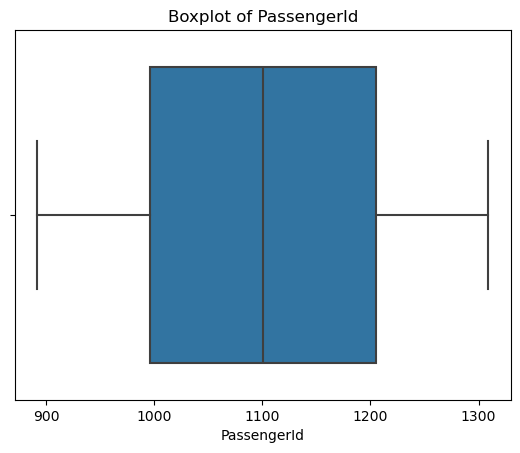

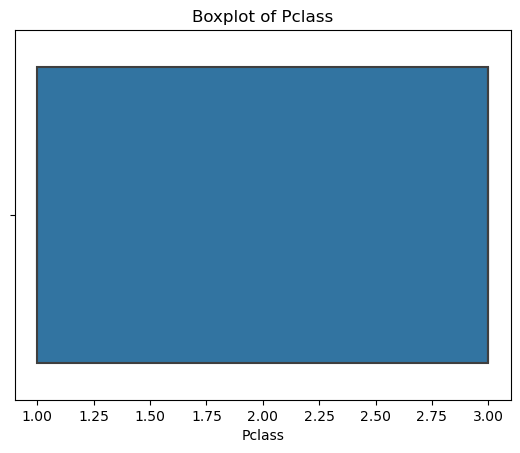

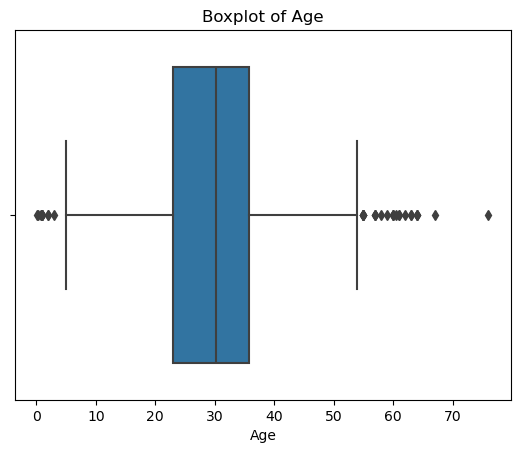

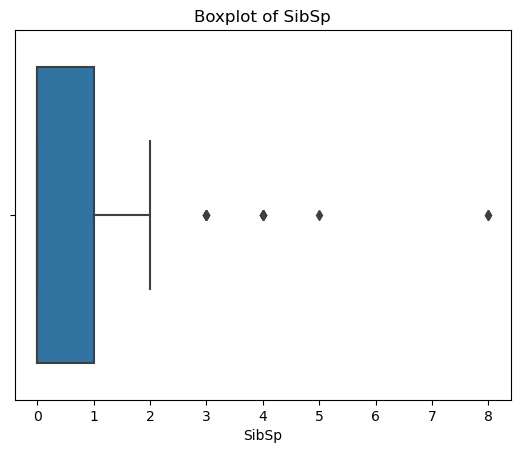

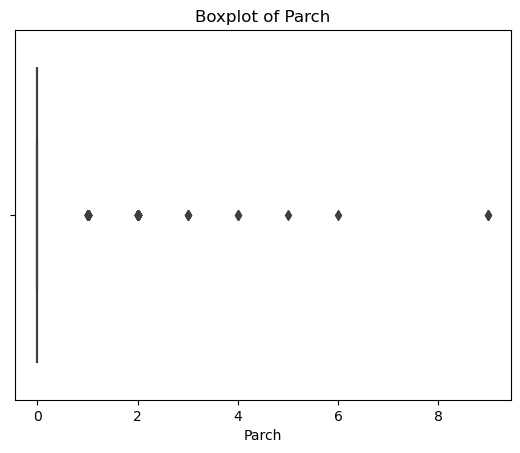

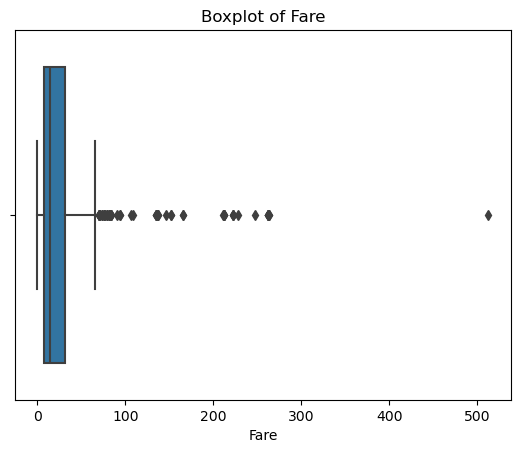

In [60]:
for col in test.columns:
    if pd.api.types.is_numeric_dtype(test[col]):
        sns.boxplot(x=test[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

Q1: 996.25, Q3: 1204.75, IQR: 208.5
Lower Bound: 683.5, Upper Bound: 1517.5


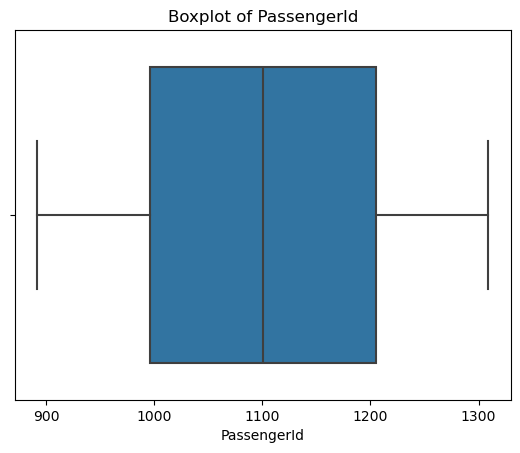

Q1: 1.0, Q3: 3.0, IQR: 2.0
Lower Bound: -2.0, Upper Bound: 6.0


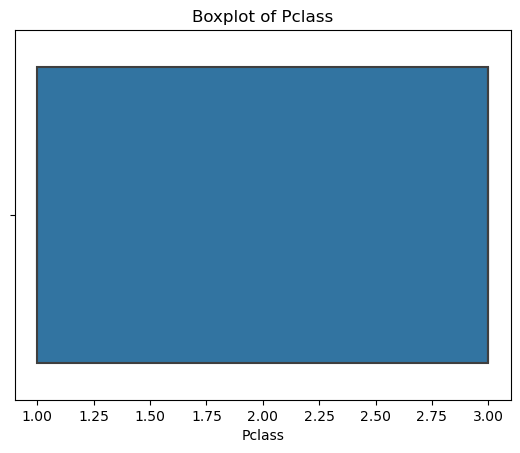

Q1: 23.0, Q3: 35.75, IQR: 12.75
Lower Bound: 3.875, Upper Bound: 54.875


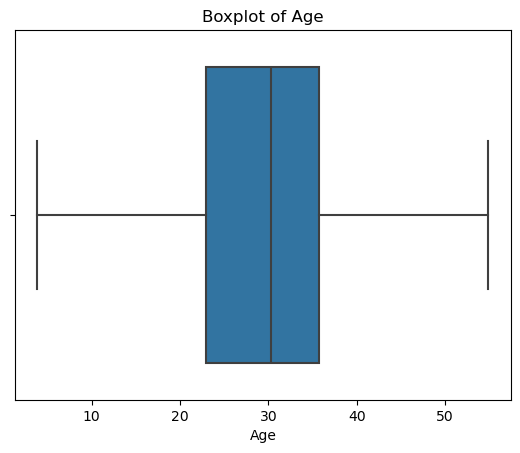

Q1: 0.0, Q3: 1.0, IQR: 1.0
Lower Bound: -1.5, Upper Bound: 2.5


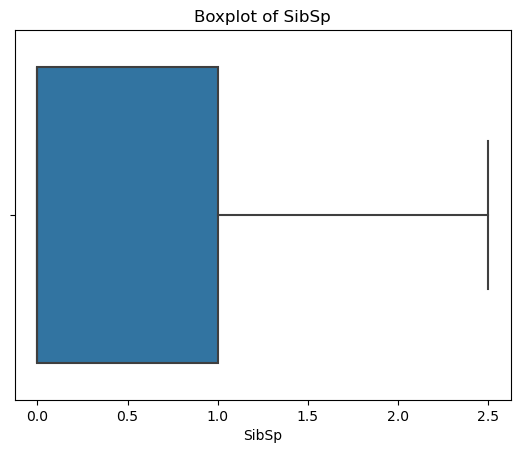

Q1: 7.8958, Q3: 31.471875, IQR: 23.576075
Lower Bound: -27.468312499999996, Upper Bound: 66.8359875


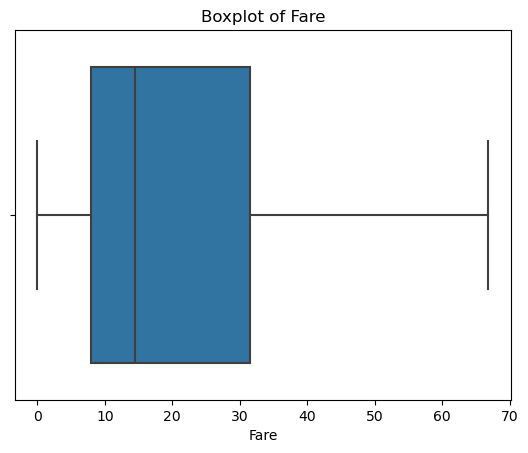

In [61]:
def handle_outliers(column):
    Q1 = test[column].quantile(0.25)
    Q3 = test[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

    lbound = Q1 - 1.5 * IQR
    ubound = Q3 + 1.5 * IQR
    print(f"Lower Bound: {lbound}, Upper Bound: {ubound}")

    test[column] = np.where(test[column] > ubound, ubound,
                          np.where(test[column] < lbound, lbound, test[column]))

for col in test.columns:
    if pd.api.types.is_numeric_dtype(test[col]):
        if col != "Parch":
            handle_outliers(col)
            sns.boxplot(x=test[col])
            plt.title(f"Boxplot of {col}")
            plt.show()


# spliting the data

In [99]:
x_train = train.drop(columns ="Survived")
y_train = train["Survived"]
x_test = test

# Label encoding

In [100]:
label = LabelEncoder()
for col in x_train.columns:
    if pd.api.types.is_object_dtype(x_train[col]):
        x_train[col] = label.fit_transform(x_train[col])

In [101]:
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1.0,3.0,1,22.0,1.0,0,523,7.2500,2
1,2.0,1.0,0,38.0,1.0,0,596,65.6344,0
2,3.0,3.0,0,26.0,0.0,0,669,7.9250,2
3,4.0,1.0,0,35.0,1.0,0,49,53.1000,2
4,5.0,3.0,1,35.0,0.0,0,472,8.0500,2


In [102]:
label = LabelEncoder()
for col in x_test.columns:
    if pd.api.types.is_object_dtype(x_test[col]):
        x_test[col] = label.fit_transform(x_test[col])

In [103]:
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892.0,3.0,1,34.500,0.0,0,152,7.8292,1
1,893.0,3.0,0,47.000,1.0,0,221,7.0000,2
2,894.0,2.0,1,54.875,0.0,0,73,9.6875,1
3,895.0,3.0,1,27.000,0.0,0,147,8.6625,2
4,896.0,3.0,0,22.000,1.0,1,138,12.2875,2


In [104]:
corr_matrix = x_train.corr()

In [105]:
corr_matrix

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.035144,0.042939,0.035533,-0.072778,-0.001652,-0.056554,0.003243,0.013128
Pclass,-0.035144,1.000000,0.131900,-0.330962,0.023180,0.018443,0.319869,-0.715300,0.162098
Sex,0.042939,0.131900,1.000000,0.077907,-0.167885,-0.245489,0.059372,-0.234969,0.108262
Age,0.035533,-0.330962,0.077907,1.000000,-0.251585,-0.186087,-0.073348,0.137498,-0.026805
SibSp,-0.072778,0.023180,-0.167885,-0.251585,1.000000,0.409366,0.032401,0.349615,0.038362
Parch,-0.001652,0.018443,-0.245489,-0.186087,0.409366,1.000000,0.020003,0.292616,0.039798
Ticket,-0.056554,0.319869,0.059372,-0.073348,0.032401,0.020003,1.000000,-0.140403,-0.001729
Fare,0.003243,-0.715300,-0.234969,0.137498,0.349615,0.292616,-0.140403,1.000000,-0.199827
Embarked,0.013128,0.162098,0.108262,-0.026805,0.038362,0.039798,-0.001729,-0.199827,1.000000


In [106]:
for i in corr_matrix:
    for j in corr_matrix:
        if abs(corr_matrix[i][j]) <=0.05 and i != j:
            print(i,j)

PassengerId Pclass
PassengerId Sex
PassengerId Age
PassengerId Parch
PassengerId Fare
PassengerId Embarked
Pclass PassengerId
Pclass SibSp
Pclass Parch
Sex PassengerId
Age PassengerId
Age Embarked
SibSp Pclass
SibSp Ticket
SibSp Embarked
Parch PassengerId
Parch Pclass
Parch Ticket
Parch Embarked
Ticket SibSp
Ticket Parch
Ticket Embarked
Fare PassengerId
Embarked PassengerId
Embarked Age
Embarked SibSp
Embarked Parch
Embarked Ticket


<Axes: >

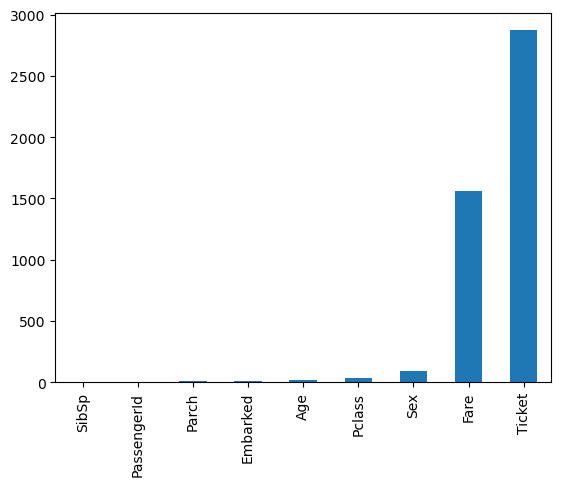

In [107]:
from sklearn.feature_selection import chi2 
chi = chi2(x_train, y_train)
chiv = pd.Series(chi[0],index = x_train.columns)
chiv.sort_values(inplace = True)
chiv.plot.bar()

In [108]:
chiv

SibSp             1.034320
PassengerId       3.312934
Parch            10.097499
Embarked         10.202525
Age              19.117670
Pclass           30.873699
Sex              92.702447
Fare           1564.437823
Ticket         2871.655466
dtype: float64

In [109]:
# low chiv value of SibSp sp deleting it 

In [110]:
x_train.drop(columns = "SibSp",inplace = True)
x_test.drop(columns = "SibSp", inplace = True)

In [111]:
x_train

,PassengerId,Pclass,Sex,Age,Parch,Ticket,Fare,Embarked
0,1.0,3.0,1,22.000000,0,523,7.2500,2
1,2.0,1.0,0,38.000000,0,596,65.6344,0
2,3.0,3.0,0,26.000000,0,669,7.9250,2
3,4.0,1.0,0,35.000000,0,49,53.1000,2
4,5.0,3.0,1,35.000000,0,472,8.0500,2
...,...,...,...,...,...,...,...,...
886,887.0,2.0,1,27.000000,0,101,13.0000,2
887,888.0,1.0,0,19.000000,0,14,30.0000,2
888,889.0,3.0,0,29.699118,2,675,23.4500,2
889,890.0,1.0,1,26.000000,0,8,30.0000,0


In [112]:
x_test

,PassengerId,Pclass,Sex,Age,Parch,Ticket,Fare,Embarked
0,892.0,3.0,1,34.50000,0,152,7.829200,1
1,893.0,3.0,0,47.00000,0,221,7.000000,2
2,894.0,2.0,1,54.87500,0,73,9.687500,1
3,895.0,3.0,1,27.00000,0,147,8.662500,2
4,896.0,3.0,0,22.00000,1,138,12.287500,2
...,...,...,...,...,...,...,...,...
413,1305.0,3.0,1,30.27259,0,267,8.050000,2
414,1306.0,1.0,0,39.00000,0,324,66.835988,0
415,1307.0,3.0,1,38.50000,0,346,7.250000,2
416,1308.0,3.0,1,30.27259,0,220,8.050000,2


In [113]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

In [114]:
x_train

array([[-1.73010796,  0.82737724,  0.73769513, ...,  0.91896631,
        -0.82055245,  0.58595414],
       [-1.72622007, -1.56610693, -1.35557354, ...,  1.28262456,
         2.03162322, -1.9423032 ],
       [-1.72233219,  0.82737724, -1.35557354, ...,  1.64628282,
        -0.78757757,  0.58595414],
       ...,
       [ 1.72233219,  0.82737724, -1.35557354, ...,  1.67617254,
        -0.02915533,  0.58595414],
       [ 1.72622007, -1.56610693,  0.73769513, ..., -1.64656796,
         0.29082313, -1.9423032 ],
       [ 1.73010796,  0.82737724,  0.73769513, ...,  0.63501397,
        -0.79612661, -0.67817453]])

In [115]:
x_test

array([[-1.72791209,  0.87348191,  0.75592895, ..., -0.26949361,
        -0.79327942, -0.47091535],
       [-1.71962474,  0.87348191, -1.32287566, ...,  0.37293425,
        -0.83243464,  0.70076689],
       [-1.71133739, -0.31581919,  0.75592895, ..., -1.00502694,
        -0.7055296 , -0.47091535],
       ...,
       [ 1.71133739,  0.87348191,  0.75592895, ...,  1.53675282,
        -0.82062952,  0.70076689],
       [ 1.71962474,  0.87348191,  0.75592895, ...,  0.3636237 ,
        -0.78285314,  0.70076689],
       [ 1.72791209,  0.87348191,  0.75592895, ..., -0.70708939,
        -0.10720836, -1.64259759]])

In [116]:
from xgboost import XGBClassifier

In [117]:
model = XGBClassifier()

In [118]:
model = model.fit(x_train,y_train)

In [119]:
pred = model.predict(x_test)

In [120]:
pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
# Assuming you have a dataframe 'submission' with 'PassengerId' and 'Survived' columns

# Ensure PassengerId is an integer type
submission['PassengerId'] = submission['PassengerId'].astype(int)

# Save the submission file as CSV without index
submission.to_csv('submission.csv', index=False)
